<a href="https://colab.research.google.com/github/Alfaalputra/machine-learning/blob/main/RPS_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-10-25 07:10:44--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 404 The specified resource does not exist.
2021-10-25 07:10:45 ERROR 404: The specified resource does not exist..



In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
from shutil import copyfile

rock_dir = os.path.join('/tmp/rockpaperscissors/rock')
paper_dir = os.path.join('/tmp/rockpaperscissors/paper')
scissors_dir = os.path.join ('/tmp/rockpaperscissors/scissors')

try:
  base_dir = ('/tmp/rockpaperscissors/models')
  os.mkdir(base_dir)
  os.chdir(base_dir)

  os.mkdir('training')
  os.mkdir('testing')
  
  os.chdir('training')
  os.mkdir('rock')
  os.mkdir('paper')
  os.mkdir('scissors')
  
  os.chdir('../testing')
  os.mkdir('rock')
  os.mkdir('paper')
  os.mkdir('scissors')

  os.chdir('../../../konten')

except OSError:
  pass

In [ ]:
import random

def split_data (source, training, testing, split_size):
  images = os.listdir(source)
  random_images = random.sample(images, len(images))
  train_size = round(len(images)* split_size)
  x = 1
  for i in random_images:
    if(os.path.getsize(source + '/' + i) == 0):
      continue
    elif(x < train_size):
      copyfile(source + '/' + i, training + '/' + i)
      x += 1
    else:
      copyfile(source + '/' + i, testing + '/' + i)
      x += 1

train_rock_dir = '/tmp/rockpaperscissors/models/training/rock'
train_paper_dir = '/tmp/rockpaperscissors/models/training/paper'
train_scissors_dir = '/tmp/rockpaperscissors/models/training/scissors'

test_rock_dir = '/tmp/rockpaperscissors/models/testing/rock'
test_paper_dir = '/tmp/rockpaperscissors/models/testing/paper'
test_scissors_dir = '/tmp/rockpaperscissors/models/testing/scissors'

split_size = 0.75
split_data(rock_dir, train_rock_dir, test_rock_dir, split_size)
split_data(paper_dir, train_paper_dir, test_paper_dir, split_size)
split_data(scissors_dir, train_scissors_dir, test_scissors_dir, split_size)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [ ]:
train_dir = '/tmp/rockpaperscissors/models/training'
train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range = 45,
                                      width_shift_range = .15,
                                      height_shift_range = .15,
                                      shear_range = .15,
                                      zoom_range = .15,
                                      horizontal_flip = True,
                                      fill_mode = 'nearest'
                                      )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')

val_dir = '/tmp/rockpaperscissors/models/testing'
val_datagen = ImageDataGenerator(rescale = 1./255)
val_generator = val_datagen.flow_from_directory(val_dir,
                                            target_size = (150,150),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1637 images belonging to 3 classes.
Found 551 images belonging to 3 classes.


In [ ]:
mdl = model.fit(train_generator,
                  steps_per_epoch = 25,
                  epochs = 30,
                  validation_data = val_generator,
                  validation_steps = 3,
                  verbose = 1)

Epoch 1/30
25/25 [==============================] - 36s 270ms/step - loss: 2.0007 - accuracy: 0.3777 - val_loss: 1.0614 - val_accuracy: 0.3229
Epoch 2/30
25/25 [==============================] - 7s 276ms/step - loss: 1.1135 - accuracy: 0.4062 - val_loss: 0.9400 - val_accuracy: 0.5104
Epoch 3/30
25/25 [==============================] - 7s 279ms/step - loss: 1.1777 - accuracy: 0.4975 - val_loss: 1.6295 - val_accuracy: 0.3958
Epoch 4/30
25/25 [==============================] - 7s 278ms/step - loss: 0.8904 - accuracy: 0.6225 - val_loss: 0.4548 - val_accuracy: 0.8542
Epoch 5/30
25/25 [==============================] - 7s 269ms/step - loss: 0.8080 - accuracy: 0.6624 - val_loss: 0.8261 - val_accuracy: 0.5625
Epoch 6/30
25/25 [==============================] - 7s 278ms/step - loss: 0.6815 - accuracy: 0.7362 - val_loss: 0.3855 - val_accuracy: 0.8542
Epoch 7/30
25/25 [==============================] - 7s 268ms/step - loss: 0.6717 - accuracy: 0.7283 - val_loss: 0.2782 - val_accuracy: 0.8958
Epoch

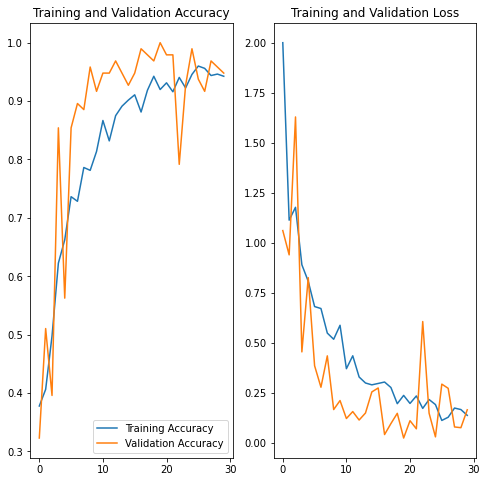

In [ ]:
import matplotlib.pyplot as plt

acc = mdl.history['accuracy']
val_acc = mdl.history['val_accuracy']

loss = mdl.history['loss']
val_loss = mdl.history['val_loss']
 
epochs_range = range(30)

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.plot(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving 2Pt5UNQkMzXLtbEp.png to 2Pt5UNQkMzXLtbEp.png
2Pt5UNQkMzXLtbEp.png
[0. 1. 0.]
rock


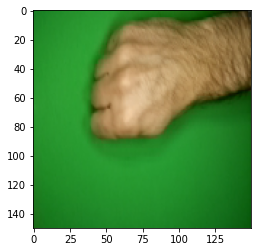

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpig
%matplotlib inline

uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)

  print(fn)
  print(classes[0])
  max_index = np.argmax(classes[0])

  if(max_index == 0):
    print('paper')
  elif(max_index == 1):
    print('rock')
  else:
    print('scissors')